In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('../mystyle.mplstyle')

`````{admonition} Remark
:class: important

Please be aware that these lecture notes are accessible online in an '**early access**' format. They are actively being developed, and certain sections will be further enriched to provide a comprehensive understanding of the subject matter.

`````

# Conic Projections

Conic projections project the Earth's surface onto a cone, which is then unwrapped to form a flat map. These projections are particularly suitable for mapping mid-latitude regions, where the distortion of area, shape, distance, and direction is minimized along the standard parallels. By striking a balance between shape and area distortion, conic projections are favored in thematic mapping, especially for regions that extend more in the east-west direction than in the north-south. Notable examples include the Albers Equal Area and Lambert Conformal Conic projections, each serving distinct purposes in cartography depending on the specific needs of the map, such as preserving area or shape accuracy {cite}`kumar2023geographic, mchaffie2023gis`.

## Equidistant Conic Projection

The equidistant conic projection is a type of conic map projection that maintains accurate distances along meridians and two standard parallels, which are selected to minimize distortion along these lines. This projection is particularly useful for regional maps, especially those with an east-west orientation, as it preserves the scale along these specific parallels, making it suitable for applications where consistent distance measurement is critical. 

{numref}`figure_Equidistant_conic_projection_SW` illustrates a world map using the **equidistant conic projection**. Key features of this projection include:

- **15° Graticule**: The grid lines on the map are spaced at 15-degree intervals, facilitating the visualization of geographic coordinates and making it easier to locate specific points on the map.

- **Standard Parallels at 20°N and 60°N**: These latitudes are chosen to minimize scale distortion, ensuring that the map's highest accuracy is along these lines. This is particularly useful for mid-latitude regions, where many populated areas and significant geographic features are located.

- **Representation**: The map preserves accurate distances along meridians, making it valuable for regional maps that require consistent distances along these lines. This is particularly advantageous for applications such as regional planning or transportation networks, where accurate distance measurement is essential.

```{figure} Equidistant_conic_projection_SW.jpg
---
width: 600px
align: center
name: figure_Equidistant_conic_projection_SW
---
Global Map on an Equidistant Conic Projection: This map features a 15-degree graticule and uses standard parallels at 20°N and 60°N to minimize scale distortion in mid-latitude regions. Credit: [Wikipedia.org](https://en.wikipedia.org/wiki/Equidistant_conic_projection). [Link to Image](https://en.wikipedia.org/wiki/Equidistant_conic_projection#/media/File:Equidistant_conic_projection_SW.JPG).
```

## Lambert Conformal Conic Projection

The Lambert Conformal Conic projection is a type of conic projection that preserves angles, making it conformal. This characteristic ensures that the shape of small areas is maintained, which is particularly important for aeronautical charts and other applications where the accurate representation of angles is crucial. In this projection, the cone intersects the globe along two standard parallels, and the selection of these parallels is critical for minimizing distortion along them.

The following key formulas are used in the Lambert Conformal Conic projection {cite}`bugayevskiy2013map,weisstein_lambert_2024, wiki_lambert_2024`:

\begin{equation}
\begin{cases}
x &= \rho \sin(\theta) \\ &\\
y &= \rho_0 - \rho \cos(\theta).
\end{cases}
\end{equation}

where:
- $\rho$: The radial distance from the origin to the point, given by:

\begin{equation}
\rho = \dfrac{R F}{\left[\tan\left(\dfrac{\phi}{2} + \dfrac{\pi}{4} \right)\right]^n}
\end{equation}

- $\theta$: The angular distance from the central meridian, given by:

\begin{equation}
\theta = n(\lambda - \lambda_0)
\end{equation}

The parameters used in these equations are defined as follows:

- $n$: The cone constant, which determines the shape of the projection. It is calculated as:

\begin{equation}
n = \dfrac{\ln\left(\dfrac{\cos(\phi_1)}{\cos(\phi_2)}\right)}{\ln\left(\dfrac{\tan\left(\dfrac{\pi}{4} + \dfrac{\phi_2}{2}\right)}{\tan\left(\dfrac{\pi}{4} + \dfrac{\phi_1}{2}\right)}\right)}
\end{equation}

- $F$: A scaling factor, given by:

\begin{equation}
F = \dfrac{1}{n} \left( \cos(\phi_1) \left[\tan\left(\dfrac{\pi}{4} + \dfrac{\phi_1}{2}\right)\right]^n \right)
\end{equation}

- $\rho_0$: The radial distance to the latitude of origin, calculated by:

\begin{equation}
\rho_0 = \dfrac{R F}{\left[\tan\left(\dfrac{\phi_0}{2} + \dfrac{\pi}{4} \right)\right]^n}
\end{equation}

In these formulas:
- $\phi$: Latitude of the point
- $\lambda$: Longitude of the point
- $\lambda_0$: Central meridian
- $\phi_1, \phi_2$: Standard parallels
- $\phi_0$: Latitude of origin
- $R$: Radius of the Earth

These equations convert spherical coordinates ($\phi, \lambda$) to planar coordinates ($x, y$) on the map. The choice of standard parallels ($\phi_1$ and $\phi_2$) is crucial as it minimizes distortion along these lines, ensuring that the map provides an accurate representation of the region's geometry, especially in areas where precise angular relationships are necessary. The Lambert Conformal Conic projection is particularly effective for mapping regions that have a larger east-west extent, such as the continental United States, as it offers a good balance between preserving shape and minimizing area distortion, making it a preferred choice for many cartographic applications.

````{prf:example}
:label: example2.7.1

Calgary is located at approximately 51.0447° N latitude and 114.0719° W longitude. We'll use these coordinates to demonstrate the Lambert Conformal Conic projection:

1. **Set up projection parameters:**
   - Central longitude ($\lambda_0$): -114°
   - Central latitude ($\phi_0$): 51.0447°
   - Standard parallels ($\phi_1, \phi_2$): 49° and 77°
   - Earth's radius ($R$): 6,371 km

2. **Convert Degrees to Radians:**
   \begin{align*}
   \lambda &= -114.0719° \times \frac{\pi}{180} = -1.9909 \text{ radians} \\
   \phi &= 51.0447° \times \frac{\pi}{180} = 0.8909 \text{ radians} \\
   \lambda_0 &= -114° \times \frac{\pi}{180} = -1.9896 \text{ radians} \\
   \phi_0 &= 51.0447° \times \frac{\pi}{180} = 0.8909 \text{ radians} \\
   \phi_1 &= 49° \times \frac{\pi}{180} = 0.8552 \text{ radians} \\
   \phi_2 &= 77° \times \frac{\pi}{180} = 1.3439 \text{ radians}
   \end{align*}

3. **Calculate projection constants:**
   \begin{align*}
   n &= \frac{\ln(\cos(\phi_1) / \cos(\phi_2))}{\ln(\tan(\pi/4 + \phi_2/2) / \tan(\pi/4 + \phi_1/2))} \\
   &= \frac{\ln(\cos(0.8552) / \cos(1.3439))}{\ln(\tan(\pi/4 + 1.3439/2) / \tan(\pi/4 + 0.8552/2))} \\
   &= 0.9007
   \end{align*}

   \begin{align*}
   F &= \frac{\cos(\phi_1) \tan^n(\pi/4 + \phi_1/2)}{n} \\
   &= \frac{\cos(0.8552) \tan^{0.9007}(\pi/4 + 0.8552/2)}{0.9007} \\
   &= 1.7668
   \end{align*}

   \begin{align*}
   \rho_0 &= \frac{F}{\tan^n(\pi/4 + \phi_0/2)} \\
   &= \frac{1.7668}{\tan^{0.9007}(\pi/4 + 0.8909/2)} \\
   &= 0.6928
   \end{align*}

4. **Calculate x and y coordinates:**
   \begin{align*}
   \rho &= \frac{F}{\tan^n(\pi/4 + \phi/2)} \\
   &= \frac{1.7668}{\tan^{0.9007}(\pi/4 + 0.8909/2)} \\
   &= 0.6928
   \end{align*}

   \begin{align*}
   \theta &= n(\lambda - \lambda_0) \\
   &= 0.9007 \times (-1.9909 - (-1.9896)) \\
   &= -0.0011
   \end{align*}

   \begin{align*}
   x &= \rho \sin(\theta) \\
   &= 0.6928 \times \sin(-0.0011) \\
   &= -0.0008 \text{ km}
   \end{align*}

   \begin{align*}
   y &= \rho_0 - \rho \cos(\theta) \\
   &= 0.6928 - 0.6928 \times \cos(-0.0011) \\
   &= 0.0000 \text{ km}
   \end{align*}

The calculated coordinates (x = -0.0008 km, y = 0.0000 km) are very close to (0, 0), confirming that Calgary is indeed at the origin of this projection as we set the central longitude and latitude to match Calgary's coordinates.

{numref}`calgary_orthographic_lambert` illustrates Calgary's location using two projections:

```{figure} calgary_orthographic_lambert.png
---
align: center
name: calgary_orthographic_lambert
---
Calgary's location shown in orthographic (left) and Lambert Conformal Conic (right) projections.
```

In [6]:
import math
from pyproj import Proj
import numpy as np

# Constants
R = 6371  # Earth's mean radius in km
lat = 51.0447  # Calgary's latitude
lon = -114.0719  # Calgary's longitude
phi1 = 49  # First standard parallel
phi2 = 77  # Second standard parallel

# Convert degrees to radians function
def deg2rad(deg):
    return deg * np.pi / 180

# Convert latitude and longitude to radians
lat_rad = deg2rad(lat)
lon_rad = deg2rad(lon)
lat0 = deg2rad(51.0447)  # Central latitude
lon0 = deg2rad(-114)     # Central longitude
lat1 = deg2rad(phi1)     # First standard parallel in radians
lat2 = deg2rad(phi2)     # Second standard parallel in radians

# Calculate projection constants for Lambert Conformal Conic
n = np.log(np.cos(lat1) / np.cos(lat2)) / np.log(np.tan(np.pi/4 + lat2/2) / np.tan(np.pi/4 + lat1/2))
print(f"n = {n:.4f} (Projection constant)")

F = (np.cos(lat1) * np.tan(np.pi/4 + lat1/2)**n) / n
print(f"F = {F:.4f} (Scale factor at the first standard parallel)")

rho0 = F / (np.tan(np.pi/4 + lat0/2)**n)
print(f"rho0 = {rho0:.4f} (Distance from origin to central parallel)")

# Calculate the projected coordinates (x, y) using the Lambert Conformal Conic formula
rho = F / (np.tan(np.pi/4 + lat_rad/2)**n)
print(f"rho = {rho:.4f} (Distance from origin to the point)")

theta = n * (lon_rad - lon0)
print(f"theta = {theta:.4f} (Angular distance from central meridian)")

x = rho * np.sin(theta)
print(f"x = {x:.4f} km (Eastward coordinate)")

y = rho0 - rho * np.cos(theta)
print(f"y = {y:.4f} km (Northward coordinate)")

# Convert the geographic coordinates (lat, lon) to radians
print("\nConverted to radians:")
print(f"λ (Longitude) = {lon_rad:.4f} radians")
print(f"φ (Latitude) = {lat_rad:.4f} radians")

# Set up the Lambert Conformal Conic projection using pyproj
lcc = Proj(proj='lcc', lat_1=phi1, lat_2=phi2, lat_0=lat, lon_0=lon0, R=R)

# Calculate the x and y coordinates using the projection
x, y = lcc(lon, lat)
print("\nLambert Conformal Conic Coordinates:")
print(f"x = {x/1000:.2f} km (Eastward coordinate from projection)")
print(f"y = {y/1000:.2f} km (Northward coordinate from projection)")

# Perform inverse projection to verify that the original coordinates are retrieved
lon_inv, lat_inv = lcc(x, y, inverse=True)
print("\nInverse Projection (should match original coordinates):")
print(f"Longitude: {lon_inv:.4f}°")
print(f"Latitude: {lat_inv:.4f}°")

# Calculate the difference between the original and inversely projected coordinates
lon_diff = abs(lon - lon_inv)
lat_diff = abs(lat - lat_inv)
print("\nDifference:")
print(f"Longitude difference: {lon_diff:.8f}°")
print(f"Latitude difference: {lat_diff:.8f}°")

n = 0.9007 (Projection constant)
F = 1.7668 (Scale factor at the first standard parallel)
rho0 = 0.6928 (Distance from origin to central parallel)
rho = 0.6928 (Distance from origin to the point)
theta = -0.0011 (Angular distance from central meridian)
x = -0.0008 km (Eastward coordinate)
y = 0.0000 km (Northward coordinate)

Converted to radians:
λ (Longitude) = -1.9909 radians
φ (Latitude) = 0.8909 radians

Lambert Conformal Conic Coordinates:
x = -4.33 km (Eastward coordinate from projection)
y = 5.25 km (Northward coordinate from projection)

Inverse Projection (should match original coordinates):
Longitude: -114.0719°
Latitude: 51.0447°

Difference:
Longitude difference: 0.00000000°
Latitude difference: 0.00000000°


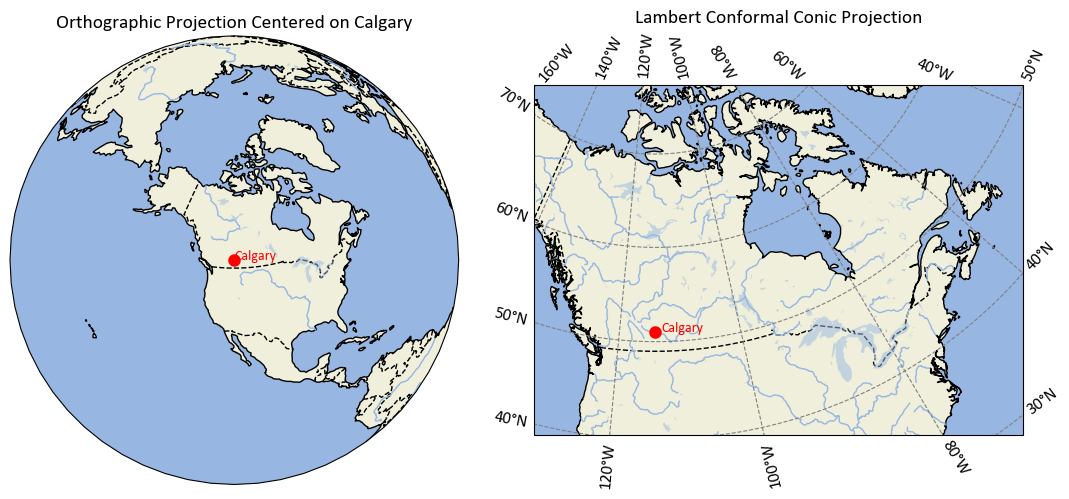

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Latitude and Longitude of Calgary
latitude_deg = 51.0447
longitude_deg = -114.0719

# Create a figure
fig = plt.figure(figsize=(11, 5))

# Left plot: Orthographic Projection
ax1 = fig.add_subplot(121, projection=ccrs.Orthographic(central_longitude=longitude_deg, central_latitude=latitude_deg))
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle='--')
ax1.add_feature(cfeature.LAKES, alpha=0.5)
ax1.add_feature(cfeature.RIVERS)

# Plot Calgary on the globe
ax1.plot(longitude_deg, latitude_deg, marker='o', color='red', markersize=8, transform=ccrs.Geodetic())
ax1.text(longitude_deg, latitude_deg, 'Calgary', color='red', transform=ccrs.Geodetic())

ax1.set_global()
ax1.set_title('Orthographic Projection Centered on Calgary', fontsize=14)

# Right plot: Lambert Conformal Conic Projection
ax2 = fig.add_subplot(122, projection=ccrs.LambertConformal(
    central_longitude=-114, central_latitude=51.0447, 
    standard_parallels=(49, 77)))

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(category='cultural',
                                                name='admin_1_states_provinces_lines',
                                                scale='50m',
                                                facecolor='none')

ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.OCEAN)
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle='--')
ax2.add_feature(cfeature.LAKES, alpha=0.5)
ax2.add_feature(cfeature.RIVERS)
# ax2.add_feature(states_provinces, edgecolor='gray')

# Plot Calgary on the map
ax2.plot(longitude_deg, latitude_deg, marker='o', color='red', markersize=8, transform=ccrs.Geodetic())
ax2.text(longitude_deg + 1, latitude_deg, 'Calgary', color='red', transform=ccrs.Geodetic())

ax2.set_extent([-130, -60, 40, 70], crs=ccrs.PlateCarree())
# Add gridlines with enlarged labels
gl = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.xlabel_style = {'size': 12}  # Adjust the font size for x-axis labels
gl.ylabel_style = {'size': 12}  # Adjust the font size for y-axis labels

ax2.set_title('Lambert Conformal Conic Projection', fontsize=14)

plt.tight_layout()
plt.savefig('calgary_orthographic_lambert.png', dpi=300, bbox_inches='tight')

````{prf:example}
:label: example2.7.2

Building on our previous calculations, from {prf:ref}`example2.7.1`, for Calgary (51.0447° N, 114.0719° W), let's extend the map extent to visualize the cone shape of the Lambert Conformal Conic projection:

1. **Projection Parameters** (from previous example):
   - Central longitude ($\lambda_0$): -114°
   - Central latitude ($\phi_0$): 51.0447°
   - Standard parallels ($\phi_1, \phi_2$): 49° and 77°
   - Earth's radius ($R$): 6,371 km

2. **Calculated Constants** (from previous example):
   - $n = 0.9007$
   - $F = 1.7668$
   - $\rho_0 = 0.6928$


To reveal the cone shape of the Lambert Conformal Conic projection, we extend the map to cover the entire Northern Hemisphere, from the equator (0°) to the North Pole (90°N), and across all longitudes (-180° to 180°).


{numref}`lambert_conformal_conic_extended` illustrates this extended Lambert Conformal Conic projection:

```{figure} lambert_conformal_conic_extended.png
---
width: 600px
align: center
name: lambert_conformal_conic_extended
---
Extended Lambert Conformal Conic projection centered on Calgary, revealing the cone shape and covering the Northern Hemisphere.
```

The extended projection shows:
- A circular map with Calgary at the center.
- Meridians (lines of longitude) converging towards the North Pole.
- Parallels (lines of latitude) as concentric circular arcs.
- The equator forming the outermost circle of the map.
- The North Pole represented as a point or small arc at the center-top of the map.

**Key Differences from Previous Example:**
   - Scale: The new map covers a much larger area, revealing the full conical structure.
   - Shape: Instead of a rectangular map section, we now see a circular segment representing the "unrolled" cone.
   - Distortion: The varying distortion across latitudes becomes more apparent, especially near the poles and equator.
   - Context: Calgary's position is now shown in relation to the entire Northern Hemisphere, rather than just North America.

**Interpreting the Extended Projection:**
   - The cone shape becomes evident, with meridians converging towards the North Pole.
   - The standard parallels (49°N and 77°N) are where the cone intersects the globe, showing minimal distortion.
   - Areas near Calgary and between the standard parallels are most accurately represented.
   - Distortion increases towards the equator and the pole, visible in the stretching of landmasses.
   - The Southern Hemisphere is not represented, as it would extend to infinity in this projection.


````

This extended view demonstrates why the Lambert Conformal Conic projection is particularly well-suited for mapping regions with large east-west extents in mid-latitudes, such as Canada or the continental United States. It balances conformality with reasonable area representation within the zone of the standard parallels, while clearly showing the limitations of the projection for global mapping.

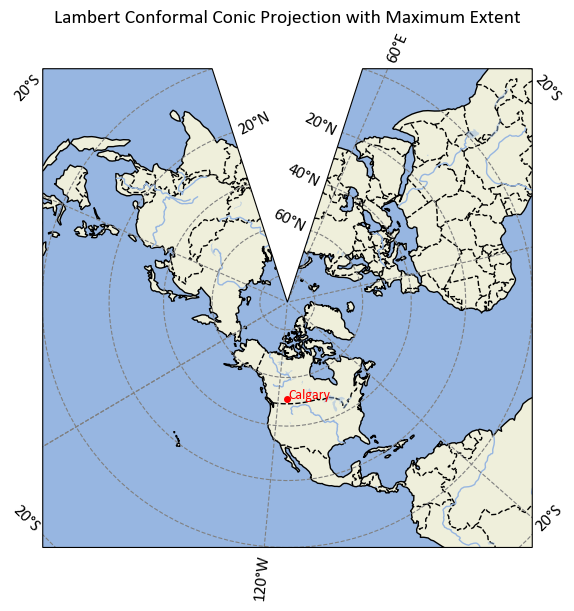

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Latitude and Longitude of Calgary
latitude_deg = 51.0447
longitude_deg = -114.0719

# Create a figure
fig = plt.figure(figsize=(10, 6))

# Lambert Conformal Conic Projection
ax = fig.add_subplot(111, projection=ccrs.LambertConformal(central_longitude=-114, central_latitude=51.0447, standard_parallels=(49, 77)))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='--')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Plot Calgary on the map
ax.plot(longitude_deg, latitude_deg, marker='o', color='red', markersize=4, transform=ccrs.Geodetic())
ax.text(longitude_deg + 1, latitude_deg, 'Calgary', color='red', transform=ccrs.Geodetic())

# Set maximum extent to cover a large area
ax.set_extent([-180, 180, 0, 90], crs=ccrs.PlateCarree())  # Maximum extent covering the entire globe
# Add gridlines with enlarged labels
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.xlabel_style = {'size': 12}  # Adjust the font size for x-axis labels
gl.ylabel_style = {'size': 12}  # Adjust the font size for y-axis labels
ax.set_title('Lambert Conformal Conic Projection with Maximum Extent', fontsize=14)

plt.tight_layout()
plt.savefig('lambert_conformal_conic_extended.png', dpi=300, bbox_inches='tight')